# Metode Pengujian

Pengujian statistik yang dipilih untuk analisis ini adalah ANOVA (Analysis of Variance) karena tujuan dari analisis ini adalah untuk membandingkan pendapatan kotor setiap cabang toko (A, B, C).

ANOVA dipilih karena memiliki beberapa kategori :
1. Variabel kategori (Diskrit / Label)
2. Variabel kontinu (Matematis / Numerik)

https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/

# Import Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import random
import matplotlib.pyplot as plt
import plotly.express as px

# Load Data

In [2]:
df = pd.read_csv("supermarket_sales_p.csv")
df

date_time branch       city customer_type  gender  \
0    2019-01-05 13:08:00      A     Yangon        Member  Female   
1    2019-03-08 10:29:00      C  Naypyitaw        Normal  Female   
2    2019-03-03 13:23:00      A     Yangon        Normal    Male   
3    2019-01-27 20:33:00      A     Yangon        Member    Male   
4    2019-02-08 10:37:00      A     Yangon        Normal    Male   
..                   ...    ...        ...           ...     ...   
995  2019-01-29 13:46:00      C  Naypyitaw        Normal    Male   
996  2019-03-02 17:16:00      B   Mandalay        Normal  Female   
997  2019-02-09 13:22:00      A     Yangon        Member    Male   
998  2019-02-22 15:33:00      A     Yangon        Normal    Male   
999  2019-02-18 13:28:00      A     Yangon        Member  Female   

               product_line      payment branch_location  unit_price  \
0         Health and beauty      Ewallet      A - Yangon       74.69   
1    Electronic accessories         Cash   C - Naypyitaw       15.28   
2        Home and lifestyle  Credit card      A - Yangon       46.33   
3         Health and beauty      Ewallet      A - Yangon       58.22   
4         Sports and travel      Ewallet      A - Yangon       86.31   
..                      ...          ...             ...         ...   
995       Health and beauty      Ewallet   C - Naypyitaw       40.35   
996      Home and lifestyle      Ewallet    B - Mandalay       97.38   
997      Food and beverages         Cash      A - Yangon       31.84   
998      Home and lifestyle         Cash      A - Yangon       65.82   
999     Fashion accessories         Cash      A - Yangon       88.34   

     quantity  tax_5_percent      total    cogs  gross_margin_percentage  \
0           7        26.1415   548.9715  522.83                 4.761905   
1           5         3.8200    80.2200   76.40                 4.761905   
2           7        16.2155   340.5255  324.31                 4.761905   
3           8        23.2880   489.0480  465.76                 4.761905   
4           7        30.2085   634.3785  604.17                 4.761905   
..        ...            ...        ...     ...                      ...   
995         1         2.0175    42.3675   40.35                 4.761905   
996        10        48.6900  1022.4900  973.80                 4.761905   
997         1         1.5920    33.4320   31.84                 4.761905   
998         1         3.2910    69.1110   65.82                 4.761905   
999         7        30.9190   649.2990  618.38                 4.761905   

     gross_income  rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 16 columns]

In [3]:
df_h = df[["branch_location", "gross_income"]]

# Hipotesis

α = 0.05 (Standart Hypothesis Test)
- H0: Tidak ada perbedaan yang signifikan antara rata-rata gross income diantara 3 toko.
- H1: Ada perbedaan yang signifikan antara rata-rata gross income dari minimal 2 toko.

# Distribution

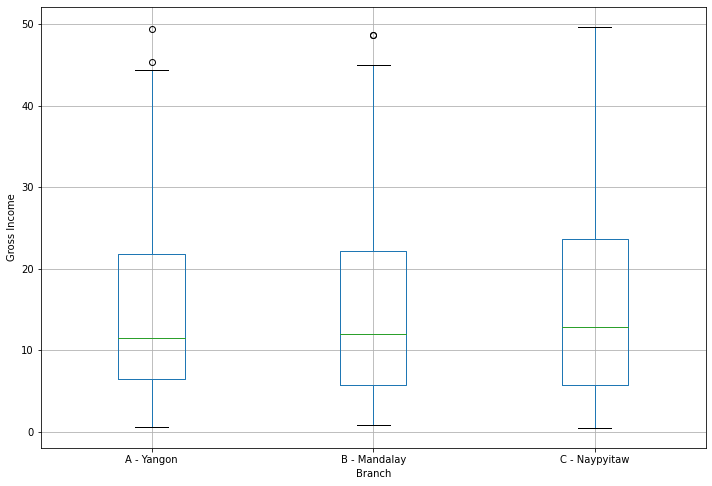

In [4]:
ax = df_h.boxplot(by="branch_location", column="gross_income", figsize=(10, 7))
ax.set_xlabel("Branch")
ax.set_ylabel("Gross Income")
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [5]:
df_h = df[["branch_location", "gross_income"]]

In [6]:
print(df_h.head())

  branch_location  gross_income
0      A - Yangon       26.1415
1   C - Naypyitaw        3.8200
2      A - Yangon       16.2155
3      A - Yangon       23.2880
4      A - Yangon       30.2085


# Permutation Test

In [7]:
observed_variance = df_h.groupby("branch_location").mean().var()[0]
print("Observed means:", df_h.groupby("branch_location").mean().values.ravel())
print("Variance:", observed_variance)
def perm_test(df_input):
    df_input = df_input.copy()
    df_input["gross_income"] = np.random.permutation(df_input["gross_income"].values)
    return df_input.groupby("branch_location").mean().var()[0]

print(perm_test(df_h))

Observed means: [14.87400147 15.2320241  16.05236738]
Variance: 0.3649482520363527
0.39588895932158713


Pr(Prob) 0.403


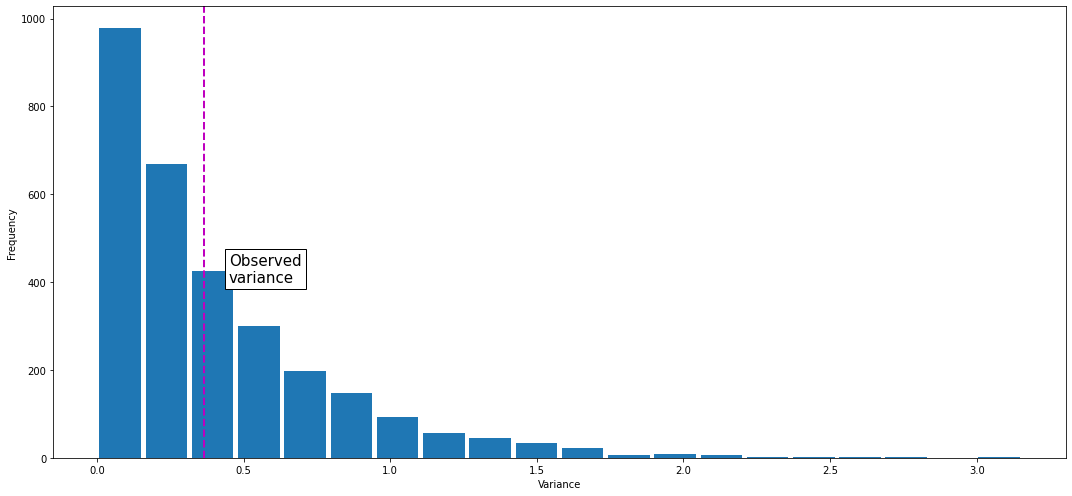

In [8]:
random.seed(1)
perm_variance = [perm_test(df_h) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(perm_variance, bins=20, rwidth=0.9)
ax.axvline(x = observed_variance, color='m', lw=2, linestyle="--")
ax.text(0.45, 400, 'Observed\nvariance', bbox={'facecolor':'white'}, fontsize=15)
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
df = pd.DataFrame(perm_variance, columns=["column"])
df.to_csv('perm_variance.csv', index = False)

## Conclusion

Karena probabilitas dari observed value > α = 0.05, we can't reject H0 which means:
- There's no significant differences between means of gross income of each branch.

# F - Statistics

In [10]:
%time model = smf.ols('gross_income ~ branch_location', data=df_h).fit()
                
%time aov_table = sm.stats.anova_lm(model)
print(aov_table)

Wall time: 130 ms
Wall time: 8 ms
                    df         sum_sq     mean_sq         F   PR(>F)
branch_location    2.0     242.602644  121.301322  0.884583  0.41321
Residual         997.0  136716.894906  137.128280       NaN      NaN


In [11]:
df_h.branch_location.unique()

array(['A - Yangon', 'C - Naypyitaw', 'B - Mandalay'], dtype=object)

In [12]:
%time res = stats.f_oneway(df_h[df_h.branch_location == 'A - Yangon'].gross_income, df_h[df_h.branch_location == 'B - Mandalay'].gross_income,df_h[df_h.branch_location == 'C - Naypyitaw'].gross_income)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

Wall time: 6 ms
F-Statistic: 0.4423
p-value: 0.2066


## Conclusion

Karena p-value is > α = 0.05, maka H0 tidak dapat ditolak / di reject sehingga:
- Tidak ada perbedaan yang signifikan antara means dari gross income dari tiap toko.

In [13]:
df

column
0     0.650980
1     0.439263
2     0.462770
3     0.150594
4     0.138442
...        ...
2995  0.933019
2996  0.993083
2997  0.119966
2998  0.329720
2999  0.010432

[3000 rows x 1 columns]

In [14]:
df = pd.read_csv('supermarket_sales_p.csv')
df_h = df[["branch", "city", "gross_income"]]
df_h

branch       city  gross_income
0        A     Yangon       26.1415
1        C  Naypyitaw        3.8200
2        A     Yangon       16.2155
3        A     Yangon       23.2880
4        A     Yangon       30.2085
..     ...        ...           ...
995      C  Naypyitaw        2.0175
996      B   Mandalay       48.6900
997      A     Yangon        1.5920
998      A     Yangon        3.2910
999      A     Yangon       30.9190

[1000 rows x 3 columns]

In [15]:
df_h.groupby(["branch", "city"]).mean().round(2).reset_index().rename(columns={'branch':'Branch','city':'Location', 'gross_income':'Average of Gross Income'})

Branch   Location  Average of Gross Income
0      A     Yangon                    14.87
1      B   Mandalay                    15.23
2      C  Naypyitaw                    16.05